<a href="https://colab.research.google.com/github/Rafia-Shaikh-eng/A-Filter-based-Feature-Selection-Approach-in-Multilabel-Classification/blob/main/Scene_Ensemble_of_filter_methods_50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# if the scikit-multilearn not installed run this cell
!pip install scikit-multilearn
# !pip install --upgrade scikit-learn scikit-multilearn
# most of the datasets in Weka Arff format for this installed this library
!pip install arff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4948 sha256=08799cddfe10f0946e75dd4e752486ad7092a0dea2dcbd367df4aa14e8246da3
  Stored in directory: /root/.cache/pip/wheels/0c/39/12/4d8ff491018bce2dd9cc6034298f27399c7f4fd4063187f7be
Successfully built arff


# 1. Scene dataset

In [ ]:
#Load scene Dataset
from skmultilearn.dataset import load_dataset
x1,y1, _, _ = load_dataset('scene', 'undivided')
print("Actual Dataset")
print(x1.shape,y1.shape)
#change to matrix
x1=x1.todense()
y1=y1.todense()
import pandas as pd
#change to dataFrame
x1=pd.DataFrame(x1)
y1=pd.DataFrame(y1)
print("Coverted into Dataframe")
print(x1.shape,y1.shape)

scene:undivided - exists, not redownloading
Actual Dataset
(2407, 294) (2407, 6)
Coverted into Dataframe
(2407, 294) (2407, 6)


## Feature Selection

### mutual information - function

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x1.columns)*0.5)
print("40% features of medical dataset = ",select_k1)

# get only the numerical features.
numerical_x1 =x1[x1.select_dtypes([np.number]).columns]
features_selected_40=[]
features_weights=[]
for a in range(len(x1.columns)):
   features_weights.append(0)
for i in range(len(y1.columns)):
  # create the SelectKBest with the mutual info strategy.
  selection =SelectKBest(mutual_info_classif, k=select_k1).fit(numerical_x1, y1.iloc[:,i])

  # display the retained features.
  features=list(x1.columns[selection.get_support()])
  labels=y1.columns[i]
  features_selected_40=[labels, features]
  #print(features_selected_40[i])
  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features_selected_40[1]:
  # for f in features:
    for count in range(len(x1.columns)):
      if(f==x1.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels
for i in range(len(x1.columns)):
  features_weights[i]=round(features_weights[i]/len(x1.columns),3)
  list_f_w.update({x1.columns[i] : features_weights[i]})

40% features of medical dataset =  147


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
MI_final_features=[]
found=False
for i in range(round(len(x1.columns)*0.5)):
    MI_final_features.append(list(sorted_dict_f.keys())[i])
MI_final_features.sort()

#drop other than top 50% weighted features
# selected_features = set(x1.columns).intersection(final_features)

#print(set(x.columns))
print(MI_final_features)

# for i in list(x1.columns):
#     if i not in selected_features:
#         MI_list_features = x1.drop(columns=[i]).copy()

#print(set(x.columns) == selected_features)


[0, 1, 2, 3, 4, 5, 10, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 54, 58, 62, 79, 82, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 151, 152, 154, 156, 158, 160, 165, 167, 169, 170, 171, 177, 182, 183, 188, 191, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 238, 244]


In [ ]:
MI_set_features=set(MI_final_features)

### Fisher score - feature selection set

In [ ]:
import numpy as np
from sklearn.feature_selection import f_classif

def calculate_fisher_score(X, Y):
    fisher_scores, _ = f_classif(X, Y)
    return fisher_scores

def select_top_K_features(scores, K):
    sorted_indices = np.argsort(scores)[::-1]
    return sorted_indices[:K]

def select_features(X, Y, K,p):
    selected_features = set()
    MI = {}  # Create an empty dictionary

    # Calculate Fisher's scores for each feature associated with each label
    for label in Y.columns:
        MI[label] = calculate_fisher_score(X, Y[label])
    # Select top K features for each label
    for label in MI.keys():
        topK = select_top_K_features(MI[label], K)
        MI[label] = topK
    # Count occurrences of selected features
    feature_counts = {}
    for label in MI.keys():
        for feature in MI[label]:
            if feature in feature_counts:
                feature_counts[feature] += 1
            else:
                feature_counts[feature] = 1

    # Select features based on the aggregated counts
    for feature, count in feature_counts.items():
        if count >= int(len((Y.columns))*p):  # Adjust this condition as needed
            selected_features.add(feature)

    return selected_features


In [ ]:
#call funtion
# Usage example
FisherS_set_features = select_features(x1, y1, K=int((x1.shape[1])*0.5),p=0.5)
# print("Selected features based on Fisher's score:", selected_features)
#updated the original x
# for i in list(x1.columns):
#     if i not in selected_features:
#         FisherS_list_features = x1.drop(columns=[i]).copy()

### ANOA - feature selection

In [ ]:
import numpy as np
from sklearn.feature_selection import f_classif

def calculate_anova_score(X, Y):
    anova_scores, _ = f_classif(X, Y)
    return anova_scores

def select_top_K_features(scores, K):
    sorted_indices = np.argsort(scores)[::-1]
    return sorted_indices[:K]

def select_features(X, Y, K,p):
    selected_features = set()
    ANOVA = {}  # Create an empty dictionary

    # Calculate ANOVA scores for each feature associated with each label
    for label in Y.columns:
        ANOVA[label] = calculate_anova_score(X, Y[label])

    # Select top K features for each label
    for label in ANOVA.keys():
        topK = select_top_K_features(ANOVA[label], K)
        ANOVA[label] = topK

    # Count occurrences of selected features
    feature_counts = {}
    for label in ANOVA.keys():
        for feature in ANOVA[label]:
            if feature in feature_counts:
                feature_counts[feature] += 1
            else:
                feature_counts[feature] = 1

    # Select features based on the aggregated counts
    for feature, count in feature_counts.items():
        if count >= int(len((Y.columns))*p):  # Adjust this condition as needed
            selected_features.add(feature)

    return selected_features

In [ ]:
#call funtion
# Usage example
ANOVA_set_features = select_features(x1, y1, K=int((x1.shape[1])*0.5),p=0.5)
# print("Selected features based on Fisher's score:", selected_features)
#updated the original x
# for i in list(x1.columns):
#     if i not in selected_features:
#         ANOVA_list_features = x1.drop(columns=[i]).copy()

### Chi2 - Feature Selection

In [ ]:
import numpy as np
from sklearn.feature_selection import f_classif

def calculate_fisher_score(X, Y):
    fisher_scores, _ = f_classif(X, Y)
    return fisher_scores

def select_top_K_features(scores, K):
    sorted_indices = np.argsort(scores)[::-1]
    return sorted_indices[:K]

def select_features(X, Y, K,p):
    selected_features = set()
    MI = {}  # Create an empty dictionary

    # Calculate Fisher's scores for each feature associated with each label
    for label in Y.columns:
        MI[label] = calculate_fisher_score(X, Y[label])
    # Select top K features for each label
    for label in MI.keys():
        topK = select_top_K_features(MI[label], K)
        MI[label] = topK
    # Count occurrences of selected features
    feature_counts = {}
    for label in MI.keys():
        for feature in MI[label]:
            if feature in feature_counts:
                feature_counts[feature] += 1
            else:
                feature_counts[feature] = 1

    # Select features based on the aggregated counts
    for feature, count in feature_counts.items():
        if count >= int(len((Y.columns))*p):  # Adjust this condition as needed
            selected_features.add(feature)

    return selected_features


In [ ]:
#call funtion
# Usage example
chi2_set_features = select_features(x1, y1, K=int((x1.shape[1])*0.5),p=0.5)
# print("Selected features based on Fisher's score:", selected_features)
#updated the original x
# for i in list(x1.columns):
#     if i not in selected_features:
#         chi2_list_features = x1.drop(columns=[i]).copy()

### Ensemble of filter techniques

In [ ]:
ensemble_features=MI_set_features.intersection(chi2_set_features,ANOVA_set_features,FisherS_set_features)

In [ ]:
len(ensemble_features)

126

In [ ]:
#updated the original x
for i in list(x1.columns):
    if i not in ensemble_features:
        x1.drop(columns=[i], inplace=True)

In [ ]:
x1.shape

(2407, 126)

## Classification

In [ ]:
import time
#Training Time
TT_medical=list()

#### Split dataset

In [ ]:
from scipy import sparse as s
x1 = s.csr_matrix(x1)
y1 = s.csr_matrix(y1)
from skmultilearn.model_selection import iterative_train_test_split
x1_train, y1_train, x1_test, y1_test = iterative_train_test_split(x1, y1, test_size = 0.3)
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(1685, 126) (722, 126) (1685, 6) (722, 6)


### MLKNN

In [ ]:
# !pip install scikit-learn==0.23.2

In [ ]:
#MLKNN
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for medical dataset it has 45 labels.
classifier2 = MLkNN(k=45)
t0=time.time()
# train
classifier2.fit(x1_train, y1_train)
TT_medical.append(round(time.time()-t0,2))
# predict
MLKNN1_predictions = classifier2.predict(x1_test)

### MLTSVM

In [ ]:
#MLTSVM
from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(max_iteration=1000,c_k=2**-6)
t0=time.time()
# train
classifier1.fit(x1_train, y1_train)
TT_medical.append(round(time.time()-t0,2))
# predict
MLTSVM1_predictions = classifier1.predict(x1_test)


### BRKKNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=45)
t0=time.time()
# train
classifier3.fit(x1_train, y1_train)
TT_medical.append(round(time.time()-t0,2))
# predict
BR1_predictions = classifier3.predict(x1_test)

### Measuring Metrices

In [ ]:
import sklearn.metrics as m
#Hamming Loss
HL_medical=list()
HL_medical.append(round(m.hamming_loss(y1_test, MLTSVM1_predictions),2))
HL_medical.append(round(m.hamming_loss(y1_test, MLKNN1_predictions),2))
HL_medical.append(round(m.hamming_loss(y1_test, BR1_predictions),2))

#Accuracy
AC_medical=list()
AC_medical.append(round(m.accuracy_score(y1_test, MLTSVM1_predictions),2))
AC_medical.append(round(m.accuracy_score(y1_test, MLKNN1_predictions),2))
AC_medical.append(round(m.accuracy_score(y1_test, BR1_predictions),2))

#Micro Precision
P_medical=list()
P_medical.append(round(m.precision_score(y1_test, MLTSVM1_predictions, average='micro', zero_division='warn'),2))
P_medical.append(round(m.precision_score(y1_test, MLKNN1_predictions, average='micro', zero_division='warn'),2))
P_medical.append(round(m.precision_score(y1_test, BR1_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
R_medical=list()
R_medical.append(round(m.recall_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
R_medical.append(round(m.recall_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
R_medical.append(round(m.recall_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))

#Micro F1 measure
F_medical=list()
F_medical.append(round(m.f1_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
F_medical.append(round(m.f1_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
F_medical.append(round(m.f1_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))


In [ ]:
results_medical=dict()
results_medical['Hamming Loss']=HL_medical
results_medical['Accuracy']=AC_medical
results_medical['Precison']=P_medical
results_medical['Recall']=R_medical
results_medical['F1 Score']=F_medical
results_medical['Training Time']=TT_medical
import pandas as pd
df_medical=pd.DataFrame(results_medical)
df_medical.head()

,Hamming Loss,Accuracy,Precison,Recall,F1 Score
0,0.82,0.00,0.18,1.00,1.98
1,0.11,0.54,0.76,0.59,16.12
2,0.10,0.53,0.81,0.55,0.00


## Graphs

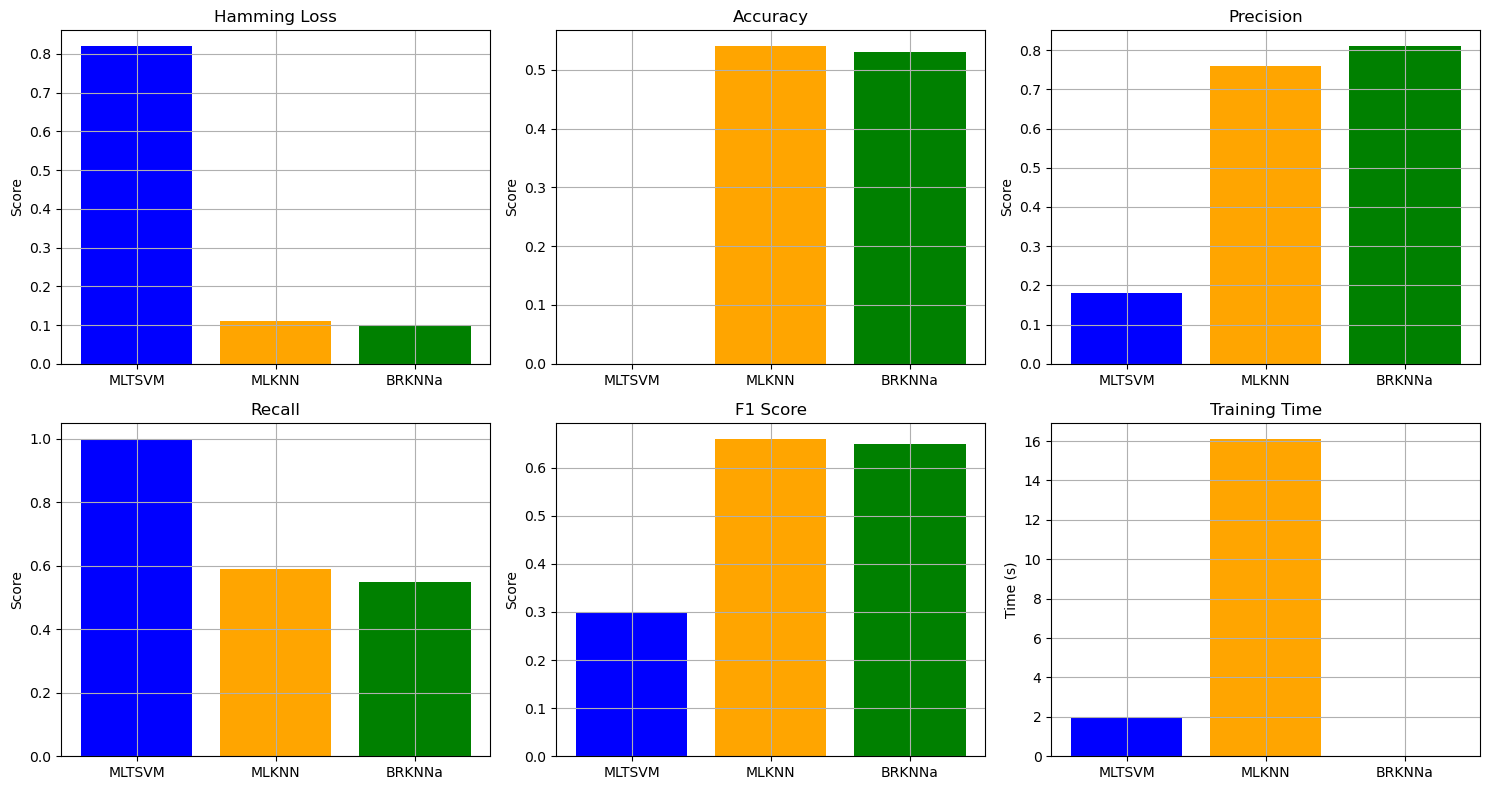

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample classifiers and metrics
classifiers = ['MLTSVM', 'MLKNN', 'BRKNNa']
metrics = ['Hamming Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time']

# Sample data for the 80% performance result
data = [HL_medical,AC_medical,P_medical,R_medical,F_medical, TT_medical]

# Create subplots in a 2x3 grid
num_rows = 2
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))  # Adjust figsize as needed

# Flatten axs array if needed
axs = axs.flatten()

# Create bar graphs in each subplot
for i, (ax, metric_values) in enumerate(zip(axs, data)):
    x_positions = np.arange(len(classifiers))
    if i == 5:  # Training time subplot, use different color
        ax.bar(x_positions, metric_values, color=['blue', 'orange', 'green'])  # One color per classifier
    else:
        ax.bar(x_positions, metric_values, color=['blue', 'orange', 'green'])  # Keep all values
    ax.set_title(metrics[i])
    ax.set_xticks(x_positions)
    ax.set_xticklabels(classifiers)
    ax.set_ylabel('Score' if metrics[i] != 'Training Time' else 'Time (s)')
    ax.grid(True)

# Adjust layout and spacing
plt.tight_layout()

# Save the image
plt.savefig('Ensmeble medical top50.png', dpi=300, bbox_inches='tight')

# Display the subplots
plt.show()


In [ ]:
F1_score